In [10]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

from utils.text_preprocessing import process_hashtags

In [11]:
def process_urls(tweet):
    urls = re.findall(r"https(.+)", tweet)
    return urls


### Load data

In [12]:
data = pd.read_csv('data/tweets/new_york_training_tweets_15_06.csv')
data = data[['tweet', 'geo_location', 'country_code', 'screen_name']]
data.shape

(332548, 4)

### Filtering

In [13]:
data = data[data['country_code'] == 'US']

data = data[data['geo_location'].isin([
                         'Manhattan, NY', 
                         'Brooklyn, NY', 
                         'Queens, NY', 
                         'Bronx, NY', 
                         'Staten Island, NY'
                         'New York, USA'
                        ])]

from utils.channels_to_filter import channels_not_to_consider
data = data[~data['screen_name'].isin(channels_not_to_consider)]

data['urls'] = data['tweet'].apply(lambda x: process_urls(x))
data['urls_count'] = data['urls'].apply(lambda x: len(x))

data['hashtags'] = data['tweet'].apply(lambda x: process_hashtags(x))
data['hashtags_count'] = data['hashtags'].apply(lambda x: len(x))

data.shape

(207183, 8)

### Distribution of tweets by urls count

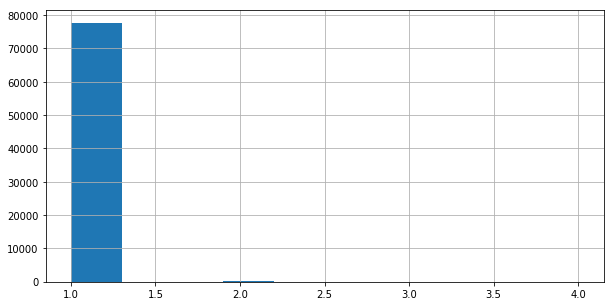

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = data[data['urls_count'] > 0]['urls_count'].hist(ax=ax)

### Distribution of tweets by hashtags count

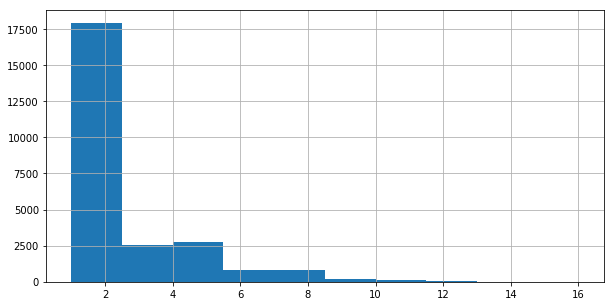

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = data[data['hashtags_count'] > 0]['hashtags_count'].hist(ax=ax)

In [24]:
data_with_urls = data[data['urls_count'] > 0]
data_with_hashtags = data[data['hashtags_count'] > 0]

### Some useful info

In [29]:
hashtags = []
for hashtag in data['hashtags']:
    hashtags.extend(hashtag)
unique_hashtags = pd.unique(hashtags).tolist()

print('Ratio tweets with / without hashtags: {:.2f}%'.format(data_with_hashtags.shape[0]/data.shape[0]*100))
print('Average number of hashtags in tweet: {:.2f}'.format(data_with_hashtags['hashtags_count'].mean()))
print('Num hashtags: {}'.format(len(hashtags)))
print('Num unique hashtags: {}'.format(len(unique_hashtags)))

Ratio tweets with / without hashtags: 12.14%
Average number of hashtags in tweet: 2.26
Num hashtags: 56715
Num unique hashtags: 23186


In [30]:
urls = []
for url in data['urls']:
    urls.extend(url)

print('Ratio tweets with / without urls: {:.2f}%'.format(data_with_urls.shape[0]/data.shape[0]*100))
print('Average number of urls in tweet: {:.2f}'.format(data_with_urls['urls_count'].mean()))
print('Num urls: {}'.format(len(urls)))

Ratio tweets with / without urls: 37.64%
Average number of urls in tweet: 1.00
Num urls: 78316


### Test performance

In [48]:
from utils.text_preprocessing import process_urls

** 1 tweet **

In [58]:
sample = data_with_urls.iloc[-3:-2]

In [59]:
%timeit sample['tweet'].apply(lambda x: process_urls(x))

243 ms ± 8.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


** 10 tweets **

In [60]:
sample = data_with_urls.iloc[-10:]

In [61]:
%timeit sample['tweet'].apply(lambda x: process_urls(x))

4.64 s ± 214 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
